## Gradient Descent Implementation

In this Python notebook we will go through an example of implementing **Gradient Descent** in simple and multiple linear regression, for this we will be using housing dataset.

In [1]:
#Importing the dataset
import pandas as pd
housing = pd.read_csv('Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
# Converting Yes to 1 and No to 0
housing['mainroad'] = housing['mainroad'].map({'yes': 1, 'no': 0})
housing['guestroom'] = housing['guestroom'].map({'yes': 1, 'no': 0})
housing['basement'] = housing['basement'].map({'yes': 1, 'no': 0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes': 1, 'no': 0})
housing['airconditioning'] = housing['airconditioning'].map({'yes': 1, 'no': 0})
housing['prefarea'] = housing['prefarea'].map({'yes': 1, 'no': 0})

In [3]:
#Converting furnishingstatus column to binary column using get_dummies
status = pd.get_dummies(housing['furnishingstatus'],drop_first=True)
housing = pd.concat([housing,status],axis=1)
housing.drop(['furnishingstatus'],axis=1,inplace=True)

In [4]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [5]:
# Normalisisng the data
housing = (housing - housing.mean())/housing.std()
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,4.562174,1.045766,1.402131,1.420507,1.376952,0.405251,-0.464888,-0.733865,-0.219063,1.471267,1.516299,1.803284,-0.844113,-0.69579
1,4.000809,1.755397,1.402131,5.400847,2.529700,0.405251,-0.464888,-0.733865,-0.219063,1.471267,2.676950,-0.553526,-0.844113,-0.69579
2,4.000809,2.216196,0.047235,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,-0.678439,1.516299,1.803284,1.182502,-0.69579
3,3.982096,1.082630,1.402131,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,1.471267,2.676950,1.803284,-0.844113,-0.69579
4,3.551716,1.045766,1.402131,-0.569663,0.224204,0.405251,2.147110,1.360148,-0.219063,1.471267,1.516299,-0.553526,-0.844113,-0.69579


In [6]:
# Simple linear regression
# Assign feature variable X
X = housing['area']

# Assign response variable to y
y = housing['price']

In [7]:
# Conventional way to import seaborn
import seaborn as sns

# To visualise in the notebook
%matplotlib inline

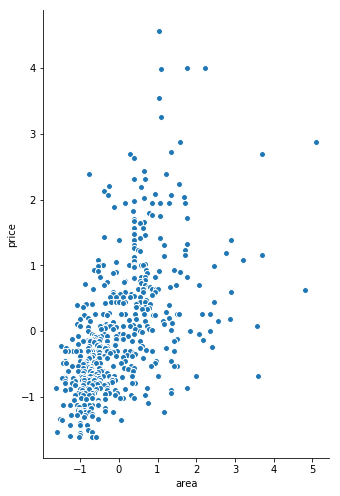

In [8]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(housing, x_vars='area', y_vars='price',size=7, aspect=0.7, kind='scatter')

**For linear regression we use a cost function known as the mean squared error or MSE.**

<img src="gd1.png"/>

Now we will apply partial derivative with respect to m and c and will equate it to zero to find the least value of m and c for which our cost function get the lowest value as possible.

<img src="gd2.png"/>

Now to apply gradient descent from scratch we need our X and y variables as numpy arrays, Let's convert them.

In [9]:
import numpy as np
X = np.array(X)
y = np.array(y)

In [10]:
# Implement gradient descent function
# Takes in X, y, current m and c (both initialised to 0), num_iterations, learning rate
# returns gradient at current m and c for each pair of m and c

def gradient(X, y, m_current=0, c_current=0, iters=1000, learning_rate=0.01):
    N = float(len(y))
    gd_df = pd.DataFrame( columns = ['m_current', 'c_current','cost'])
    for i in range(iters):
        y_current = (m_current * X) + c_current
        cost = sum([data**2 for data in (y-y_current)]) / N
        m_gradient = -(2/N) * sum(X * (y - y_current))
        c_gradient = -(2/N) * sum(y - y_current)
        m_current = m_current - (learning_rate * m_gradient)
        c_current = c_current - (learning_rate * c_gradient)
        gd_df.loc[i] = [m_current,c_current,cost]
    return(gd_df)


In [11]:
# print gradients at multiple (m, c) pairs
# notice that gradient decreased gradually towards 0
# we have used 1000 iterations, can use more if needed
gradients = gradient(X,y)
gradients

,m_current,c_current,cost
0,0.010700,5.117211e-18,0.998165
1,0.021187,2.230224e-17,0.986830
2,0.031464,3.243888e-17,0.975943
3,0.041536,3.045067e-17,0.965486
4,0.051407,2.675943e-17,0.955442
5,0.061081,3.053215e-17,0.945796
6,0.070562,3.956876e-17,0.936530
7,0.079854,4.067694e-17,0.927631
8,0.088960,4.414817e-17,0.919084
9,0.097884,5.958944e-17,0.910875


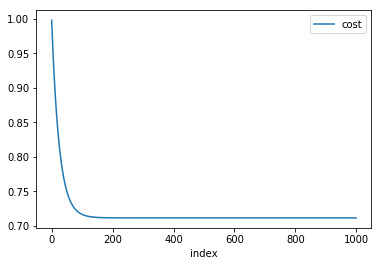

In [12]:
# plotting cost against num_iterations
gradients.reset_index().plot.line(x='index', y=['cost'])

### Multiple Regression: Applying Gradient Descent for Multiple (>1) Features

In [13]:
# Assigning feature variable X
X = housing[['area','bedrooms']]

# Assigning response variable y
y = housing['price']

In [14]:
# Add a columns of 1s as an intercept to X.
# The intercept column is needed for convenient matrix representation of cost function

X['intercept'] = 1
X = X.reindex_axis(['intercept','area','bedrooms'], axis=1)
X.head()

E:\anaconda1\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
E:\anaconda1\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """


,intercept,area,bedrooms
0,1,1.045766,1.402131
1,1,1.755397,1.402131
2,1,2.216196,0.047235
3,1,1.082630,1.402131
4,1,1.045766,1.402131


In [15]:
# Convert X and y to arrays
import numpy as np
X = np.array(X)
y = np.array(y)

In [16]:
# Theta is the vector representing coefficients (intercept, area, bedrooms)
theta = np.matrix(np.array([0,0,0])) 
alpha = 0.01
iterations = 1000

In [17]:
# define cost function
# takes in theta (current values of coefficients b0, b1, b2), X and y
# returns total cost at current b0, b1, b2

def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

More on [Numpy Matmul](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html)

<img src="gd.png"/>

In [18]:
# gradient descent
# takes in current X, y, learning rate alpha, num_iters
# returns cost (notice it uses the cost function defined above)

def gradient_descent_multi(X, y, theta, alpha, iterations):
    theta = np.zeros(X.shape[1])
    m = len(X)
    gdm_df = pd.DataFrame( columns = ['Bets','cost'])

    for i in range(iterations):
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        gdm_df.loc[i] = [theta,cost]

    return gdm_df

In [19]:
# print costs with various values of coefficients b0, b1, b2
gradient_descent_multi(X, y, theta, alpha, iterations)

,Bets,cost
0,"[2.3711919278232707e-18, 0.005350138644096793,...",0.494906
1,"[3.617901085750969e-18, 0.010641328951860771, ...",0.490824
2,"[5.785382366854027e-18, 0.015874226967184046, ...",0.486834
3,"[8.075090035989212e-18, 0.021049481374934606, ...",0.482935
4,"[1.0368871918058801e-17, 0.026167733584010238,...",0.479124
5,"[1.2243009867884753e-17, 0.031229617809450716,...",0.475400
6,"[1.472827975787134e-17, 0.03623576115361897, 0...",0.471759
7,"[1.62235159047977e-17, 0.041186783686461836, 0...",0.468202
8,"[1.7910240059641056e-17, 0.04608329852486083, ...",0.464724
9,"[2.06399627256919e-17, 0.05092591191108336, 0....",0.461326


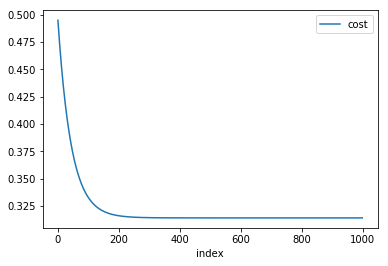

In [20]:
# print cost
gradient_descent_multi(X, y, theta, alpha, iterations).reset_index().plot.line(x='index', y=['cost'])